<a href="https://colab.research.google.com/github/a00101/datascience101/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import pandas as pd

In [220]:
df = pd.read_table("Train_sample.txt", sep="\t", index_col=0)
df.head()

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,...,G[C>T]C,G[C>T]G,G[C>T]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Answer
MutationType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11LU022_T,25,31,22,22,6,4,1,4,5,4,7,2,4,4,12,2,1,4,8,1,0,1,3,1,65,79,46,58,10,6,4,6,13,12,6,16,8,16,48,13,...,5,7,5,10,1,13,5,12,6,7,7,1,0,3,0,26,34,31,29,3,14,5,11,10,13,5,7,2,6,6,4,0,5,6,3,0,1,4,1,LUAD
11LU035_T,1,1,1,0,0,0,0,3,2,1,2,0,0,1,0,0,2,1,0,0,0,0,0,0,2,2,2,2,1,0,0,0,2,3,2,1,0,0,2,0,...,1,2,3,0,1,2,1,2,0,1,0,0,0,1,0,4,3,0,2,4,0,0,1,2,1,2,4,0,0,0,0,0,1,0,0,0,1,0,0,LUAD
C3L-00080_T,16,26,13,11,4,5,3,0,7,5,8,6,1,2,6,1,1,0,1,3,0,0,1,1,52,49,30,31,6,4,9,3,19,9,14,14,8,6,16,7,...,10,18,3,4,6,14,4,3,2,2,2,0,1,1,2,17,36,15,11,8,8,3,13,10,4,3,9,2,5,4,5,2,2,2,2,0,0,4,2,LUAD
C3L-00083_T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LUAD
C3L-00093_T,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,6,0,1,0,0,0,...,0,3,3,0,0,0,1,0,0,0,1,0,0,0,0,2,0,2,1,8,7,2,14,27,8,6,14,0,1,0,1,1,0,0,0,0,0,0,1,LUAD


In [221]:
encoded_df = pd.get_dummies(df)
encoded_df.head()


,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,...,G[C>T]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Answer_LUAD,Answer_LUSC,Answer_PDAC
MutationType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11LU022_T,25,31,22,22,6,4,1,4,5,4,7,2,4,4,12,2,1,4,8,1,0,1,3,1,65,79,46,58,10,6,4,6,13,12,6,16,8,16,48,13,...,5,10,1,13,5,12,6,7,7,1,0,3,0,26,34,31,29,3,14,5,11,10,13,5,7,2,6,6,4,0,5,6,3,0,1,4,1,1,0,0
11LU035_T,1,1,1,0,0,0,0,3,2,1,2,0,0,1,0,0,2,1,0,0,0,0,0,0,2,2,2,2,1,0,0,0,2,3,2,1,0,0,2,0,...,3,0,1,2,1,2,0,1,0,0,0,1,0,4,3,0,2,4,0,0,1,2,1,2,4,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
C3L-00080_T,16,26,13,11,4,5,3,0,7,5,8,6,1,2,6,1,1,0,1,3,0,0,1,1,52,49,30,31,6,4,9,3,19,9,14,14,8,6,16,7,...,3,4,6,14,4,3,2,2,2,0,1,1,2,17,36,15,11,8,8,3,13,10,4,3,9,2,5,4,5,2,2,2,2,0,0,4,2,1,0,0
C3L-00083_T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
C3L-00093_T,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,6,0,1,0,0,0,...,3,0,0,0,1,0,0,0,1,0,0,0,0,2,0,2,1,8,7,2,14,27,8,6,14,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0


In [241]:
독립 = encoded_df[["A[C>A]A","A[C>A]C","A[C>A]G","A[C>A]T","A[C>G]A","A[C>G]C","A[C>G]G","A[C>G]T","A[C>T]A","A[C>T]C","A[C>T]G","A[C>T]T","A[T>A]A","A[T>A]C","A[T>A]G","A[T>A]T","A[T>C]A","A[T>C]C","A[T>C]G","A[T>C]T","A[T>G]A","A[T>G]C","A[T>G]G","A[T>G]T","C[C>A]A","C[C>A]C","C[C>A]G","C[C>A]T","C[C>G]A","C[C>G]C","C[C>G]G","C[C>G]T","C[C>T]A","C[C>T]C","C[C>T]G","C[C>T]T","C[T>A]A","C[T>A]C","C[T>A]G","C[T>A]T","C[T>C]A","C[T>C]C","C[T>C]G","C[T>C]T","C[T>G]A","C[T>G]C","C[T>G]G","C[T>G]T","G[C>A]A","G[C>A]C","G[C>A]G","G[C>A]T","G[C>G]A","G[C>G]C","G[C>G]G","G[C>G]T","G[C>T]A","G[C>T]C","G[C>T]G","G[C>T]T","G[T>A]A","G[T>A]C","G[T>A]G","G[T>A]T","G[T>C]A","G[T>C]C","G[T>C]G","G[T>C]T","G[T>G]A","G[T>G]C","G[T>G]G","G[T>G]T","T[C>A]A","T[C>A]C","T[C>A]G","T[C>A]T","T[C>G]A","T[C>G]C","T[C>G]G","T[C>G]T","T[C>T]A","T[C>T]C","T[C>T]G","T[C>T]T","T[T>A]A","T[T>A]C","T[T>A]G","T[T>A]T","T[T>C]A","T[T>C]C","T[T>C]G","T[T>C]T","T[T>G]A","T[T>G]C","T[T>G]G","T[T>G]T"]]
종속 = encoded_df[["Answer_LUAD", "Answer_LUSC"]]

In [242]:
print(독립.shape, 종속.shape)

(5139, 96) (5139, 2)


In [226]:
X = tf.keras.layers.Input(shape=[96])
H = tf.keras.layers.Dense(96*2, activation="swish")(X)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [227]:
history = model.fit(독립, 종속, epochs=25)

Epoch 1/25
161/161 [==============================] - 2s 4ms/step - loss: 0.3455 - accuracy: 0.9206
Epoch 2/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1523 - accuracy: 0.9704
Epoch 3/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9776
Epoch 4/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1161 - accuracy: 0.9751
Epoch 5/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1040 - accuracy: 0.9778
Epoch 6/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9796
Epoch 7/25
161/161 [==============================] - 1s 4ms/step - loss: 0.0962 - accuracy: 0.9800
Epoch 8/25
161/161 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9788
Epoch 9/25
161/161 [==============================] - 1s 4ms/step - loss: 0.0887 - accuracy: 0.9794
Epoch 10/25
161/161 [==============================] - 1s 4ms/step - loss: 0.1014 - accuracy: 0.9774

In [228]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 96)]              0         
                                                                 
 dense_52 (Dense)            (None, 192)               18624     
                                                                 
 dense_53 (Dense)            (None, 192)               37056     
                                                                 
 dense_54 (Dense)            (None, 192)               37056     
                                                                 
 dense_55 (Dense)            (None, 192)               37056     
                                                                 
 dense_56 (Dense)            (None, 3)                 579       
                                                                 
Total params: 130,371
Trainable params: 130,371
Non-traina

In [229]:
df_test = pd.read_table("Test_sample.txt", sep="\t", index_col=0)
df_test.head()
독립_test = encoded_df[["A[C>A]A","A[C>A]C","A[C>A]G","A[C>A]T","A[C>G]A","A[C>G]C","A[C>G]G","A[C>G]T","A[C>T]A","A[C>T]C","A[C>T]G","A[C>T]T","A[T>A]A","A[T>A]C","A[T>A]G","A[T>A]T","A[T>C]A","A[T>C]C","A[T>C]G","A[T>C]T","A[T>G]A","A[T>G]C","A[T>G]G","A[T>G]T","C[C>A]A","C[C>A]C","C[C>A]G","C[C>A]T","C[C>G]A","C[C>G]C","C[C>G]G","C[C>G]T","C[C>T]A","C[C>T]C","C[C>T]G","C[C>T]T","C[T>A]A","C[T>A]C","C[T>A]G","C[T>A]T","C[T>C]A","C[T>C]C","C[T>C]G","C[T>C]T","C[T>G]A","C[T>G]C","C[T>G]G","C[T>G]T","G[C>A]A","G[C>A]C","G[C>A]G","G[C>A]T","G[C>G]A","G[C>G]C","G[C>G]G","G[C>G]T","G[C>T]A","G[C>T]C","G[C>T]G","G[C>T]T","G[T>A]A","G[T>A]C","G[T>A]G","G[T>A]T","G[T>C]A","G[T>C]C","G[T>C]G","G[T>C]T","G[T>G]A","G[T>G]C","G[T>G]G","G[T>G]T","T[C>A]A","T[C>A]C","T[C>A]G","T[C>A]T","T[C>G]A","T[C>G]C","T[C>G]G","T[C>G]T","T[C>T]A","T[C>T]C","T[C>T]G","T[C>T]T","T[T>A]A","T[T>A]C","T[T>A]G","T[T>A]T","T[T>C]A","T[T>C]C","T[T>C]G","T[T>C]T","T[T>G]A","T[T>G]C","T[T>G]G","T[T>G]T"]]
종속_test = encoded_df[["Answer_LUAD", "Answer_LUSC", "Answer_PDAC"]]

In [230]:
print(독립_test.shape, 종속_test.shape)

(5139, 96) (5139, 3)


In [235]:
history_test = model.predict(독립_test)
print(history_test)

[[6.1790686e-02 1.1057591e-05 9.3819827e-01]
 [5.9101027e-02 2.0755404e-06 9.4089693e-01]
 [6.7785986e-06 4.1971791e-08 9.9999321e-01]
 ...
 [1.1565153e-13 1.0000000e+00 2.6268368e-11]
 [1.4590982e-16 1.0000000e+00 2.5532595e-14]
 [3.5341434e-36 1.0000000e+00 8.3507600e-30]]


In [246]:
print(종속_test.shape[-1])

3


In [249]:

roc_curve(종속_test[:,1], history_test[:,1])

# for i in range(종속_test.shape[-1]):
#     fprs, tprs, _ = roc_curve(종속_test[:,i], history_test[:,i])
#     plt.plot(fprs, tprs, label='{}'.format(i))

TypeError: ignored

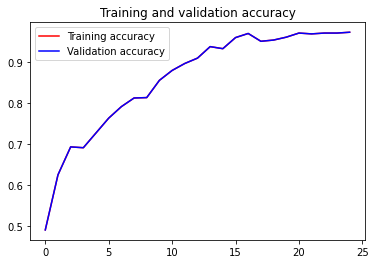

<Figure size 432x288 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [181]:
df_test = pd.read_table("Test_sample.txt", sep="\t", index_col=0)
encoded_df_test = pd.get_dummies(df_test)
독립_test = encoded_df_test[["A[C>A]A","A[C>A]C","A[C>A]G","A[C>A]T","A[C>G]A","A[C>G]C","A[C>G]G","A[C>G]T","A[C>T]A","A[C>T]C","A[C>T]G","A[C>T]T","A[T>A]A","A[T>A]C","A[T>A]G","A[T>A]T","A[T>C]A","A[T>C]C","A[T>C]G","A[T>C]T","A[T>G]A","A[T>G]C","A[T>G]G","A[T>G]T","C[C>A]A","C[C>A]C","C[C>A]G","C[C>A]T","C[C>G]A","C[C>G]C","C[C>G]G","C[C>G]T","C[C>T]A","C[C>T]C","C[C>T]G","C[C>T]T","C[T>A]A","C[T>A]C","C[T>A]G","C[T>A]T","C[T>C]A","C[T>C]C","C[T>C]G","C[T>C]T","C[T>G]A","C[T>G]C","C[T>G]G","C[T>G]T","G[C>A]A","G[C>A]C","G[C>A]G","G[C>A]T","G[C>G]A","G[C>G]C","G[C>G]G","G[C>G]T","G[C>T]A","G[C>T]C","G[C>T]G","G[C>T]T","G[T>A]A","G[T>A]C","G[T>A]G","G[T>A]T","G[T>C]A","G[T>C]C","G[T>C]G","G[T>C]T","G[T>G]A","G[T>G]C","G[T>G]G","G[T>G]T","T[C>A]A","T[C>A]C","T[C>A]G","T[C>A]T","T[C>G]A","T[C>G]C","T[C>G]G","T[C>G]T","T[C>T]A","T[C>T]C","T[C>T]G","T[C>T]T","T[T>A]A","T[T>A]C","T[T>A]G","T[T>A]T","T[T>C]A","T[T>C]C","T[T>C]G","T[T>C]T","T[T>G]A","T[T>G]C","T[T>G]G","T[T>G]T"]]
종속_test = encoded_df_test[["Answer_LUAD", "Answer_LUSC"]]

In [182]:
inputfile = open("Test.txt")

inputfile.readline()
k = 1
correct = 0
incorrect = 0

bag_acc = []
bag_loss = []


for line in inputfile:
    elms = line.strip().split("\t")
    values = list(map(int, elms[1:97]))
    criteria = np.array([values])
    results = elms[97]

    a = model.predict(criteria)
    # print(model.predict(criteria))
    if a[0][0] > a[0][1]:
        prediction = "LUAD"
    elif a[0][0] < a[0][1]:
        prediction = "LUSC"
    
    if prediction == results:
        correct += 1
    elif prediction != results:
        incorrect += 1

    bag_acc.append(round(correct/k,2))
    bag_loss.append(round(incorrect/k,2))

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

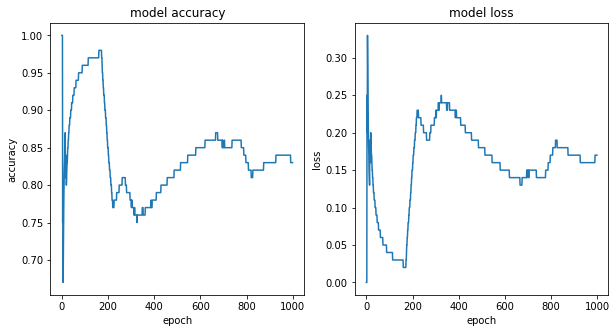

In [183]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(bag_acc) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')
ax1.plot(bag_loss) 
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')


In [184]:
print(round(np.mean(bag_acc)*100,2), round(np.mean(bag_loss)*100,2))

84.26 15.74


In [216]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [270]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Y.shape[-1]):
    fpr[i], tpr[i], _ = roc_curve(np.asarray(종속_test)[:,i], history_test[:,i])
    roc_auc[i] = roc_auc_score(np.asarray(종속_test)[:, i], history_test[:, i])

fpr["micro"], tpr["micro"], _ = roc_curve(np.asarray(종속_test).ravel(), history_test.ravel())
roc_auc["micro"] = roc_auc_score(np.asarray(종속_test).ravel(), history_test.ravel())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


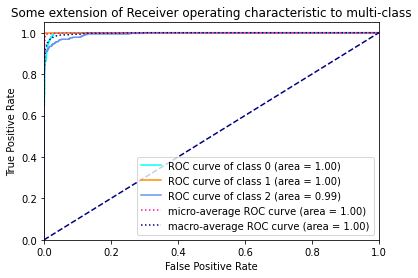

In [272]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i],
             color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],
         color='navy', linestyle='--')

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()